In [35]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot
from sklearn.svm import SVC

In [8]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [21]:
X, y = pd.DataFrame(data.data, columns=data.feature_names), pd.DataFrame(data.target,columns=['target'])

In [23]:
cancer = pd.concat([X,y],axis=1)

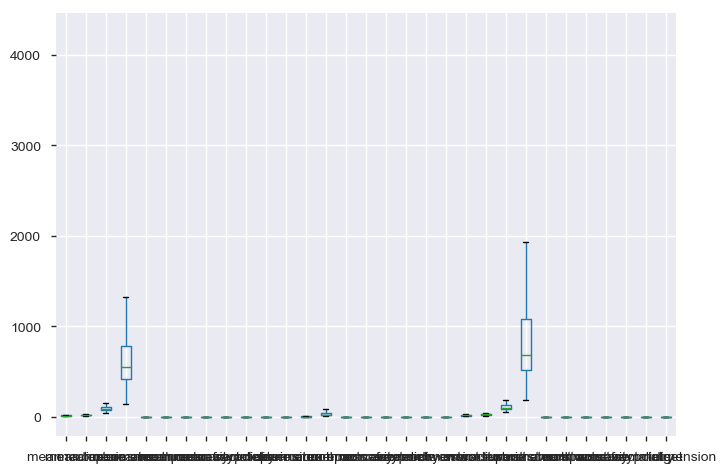

In [24]:
cancer.boxplot()

In [25]:
from pandas_profiling import ProfileReport

In [26]:
ProfileReport(cancer)

Number of variables,31
Number of observations,569
Total Missing (%),0.0%
Total size in memory,135.7 KiB
Average record size in memory,244.1 B
Numeric,20
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,10


In [29]:
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [31]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [32]:
cancer.filter

<bound method NDFrame.filter of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         17.990         10.38          122.80     1001.0          0.11840   
1         20.570         17.77          132.90     1326.0          0.08474   
2         19.690         21.25          130.00     1203.0          0.10960   
3         11.420         20.38           77.58      386.1          0.14250   
4         20.290         14.34          135.10     1297.0          0.10030   
5         12.450         15.70           82.57      477.1          0.12780   
6         18.250         19.98          119.60     1040.0          0.09463   
7         13.710         20.83           90.20      577.9          0.11890   
8         13.000         21.82           87.50      519.8          0.12730   
9         12.460         24.04           83.97      475.9          0.11860   
10        16.020         23.24          102.70      797.8          0.08206   
11        15.780         17.89  

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.model_selection import cross_val_score

In [40]:
t = cross_val_score(KNeighborsClassifier(),cancer.iloc[:,:-1],cancer.iloc[:,-1],cv=10)

In [41]:
t

array([0.9137931 , 0.87931034, 0.89473684, 0.96491228, 0.94736842,
       0.92982456, 0.96491228, 0.92857143, 0.91071429, 0.96428571])

In [36]:
print(np.mean(t),np.std(t))

0.9298429262812202 0.028921039975408073


In [42]:
from sklearn.model_selection import train_test_split #성능알기위해

In [39]:
X_train, X_test, y_train, y_test = train_test_split(cancer.iloc[:,:-1],cancer.iloc[:,-1])

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
from sklearn.pipeline import Pipeline  #정통적인 인스턴스화

from sklearn.pipeline import make_pipeline  ---- 다른방식으로 만드는방법

In [46]:
pipe_ex = Pipeline() #바로 인스턴스화 하면 애러난다.

TypeError: __init__() missing 1 required positional argument: 'steps'

In [55]:
pipe = Pipeline([('scaler',MinMaxScaler()), ('knn',KNeighborsClassifier())],'sun')

In [56]:
pipe.fit(X_train, y_train)

Pipeline(memory='sun',
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))])

In [57]:
vars(pipe)

{'steps': [('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=None, n_neighbors=5, p=2,
              weights='uniform'))],
 'memory': 'sun'}

In [64]:
pipe.steps

[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('knn',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

---

In [60]:
from sklearn.preprocessing import RobustScaler

In [61]:
from sklearn.decomposition import PCA

In [62]:
from sklearn.pipeline import make_pipeline

In [67]:
t = make_pipeline(RobustScaler(),PCA())

In [68]:
t.steps

[('robustscaler',
  RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
         with_scaling=True)),
 ('pca',
  PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))]

In [65]:
from sklearn.preprocessing import StandardScaler

In [69]:
make_pipeline(StandardScaler(),PCA(n_components=2),StandardScaler())

Pipeline(memory=None,
     steps=[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))])

In [74]:
temp = []
for i in range(cancer.shape[1] - 1,1,-1):
    pca = PCA(i)
    x = pca.fit_transform(cancer.iloc[:,:-1])
    knn = KNeighborsClassifier()
    t = cross_val_score(knn,x,cancer.iloc[:,-1],cv=10)
    temp.append(np.mean(t))
np.max(temp)    

0.9316286405669347

In [83]:
pipe = make_pipeline(PCA(2),KNeighborsClassifier())
grid = GridSearchCV(pipe,{"kneighborsclassifier__n_neighbors":[2,3,4,5,6]})

In [84]:
pipe.steps

[('pca',
  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
 ('kneighborsclassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform'))]

In [87]:
grid.fit(cancer.iloc[:,:-1],cancer.iloc[:,-1])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kneighborsclassifier__n_neighbors': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
grid.cv_results_

{'mean_fit_time': array([0.00200073, 0.00233388, 0.00200033, 0.00133689, 0.00166686]),
 'std_fit_time': array([1.29616312e-06, 4.72045065e-04, 3.37174788e-07, 4.76540367e-04,
        4.71426801e-04]),
 'mean_score_time': array([0.00433127, 0.00433302, 0.00399915, 0.00432952, 0.00433318]),
 'std_score_time': array([4.71089385e-04, 4.73057670e-04, 4.89903609e-07, 4.74205117e-04,
        4.71763815e-04]),
 'param_kneighborsclassifier__n_neighbors': masked_array(data=[2, 3, 4, 5, 6],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kneighborsclassifier__n_neighbors': 2},
  {'kneighborsclassifier__n_neighbors': 3},
  {'kneighborsclassifier__n_neighbors': 4},
  {'kneighborsclassifier__n_neighbors': 5},
  {'kneighborsclassifier__n_neighbors': 6}],
 'split0_test_score': array([0.87368421, 0.89473684, 0.90526316, 0.9       , 0.90526316]),
 'split1_test_score': array([0.91052632, 0.93157895, 0.93684211, 0.94736842, 0.947368

In [91]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002001,1.296163e-06,0.004331,4.710894e-04,2,{'kneighborsclassifier__n_neighbors': 2},0.873684,0.910526,0.873016,0.885764,0.017534,5,0.960422,0.963061,0.965789,0.963091,0.002191
1,0.002334,4.720451e-04,0.004333,4.730577e-04,3,{'kneighborsclassifier__n_neighbors': 3},0.894737,0.931579,0.878307,0.901582,0.022272,4,0.955145,0.947230,0.950000,0.950792,0.003280
2,0.002000,3.371748e-07,0.003999,4.899036e-07,4,{'kneighborsclassifier__n_neighbors': 4},0.905263,0.936842,0.899471,0.913884,0.016426,3,0.949868,0.939314,0.942105,0.943762,0.004465
3,0.001337,4.765404e-04,0.004330,4.742051e-04,5,{'kneighborsclassifier__n_neighbors': 5},0.900000,0.947368,0.920635,0.922671,0.019408,2,0.955145,0.926121,0.947368,0.942878,0.012267
4,0.001667,4.714268e-04,0.004333,4.717638e-04,6,{'kneighborsclassifier__n_neighbors': 6},0.905263,0.947368,0.920635,0.924429,0.017411,1,0.947230,0.931398,0.944737,0.941122,0.006950


In [92]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 6}

In [72]:
from sklearn.model_selection import GridSearchCV

In [95]:
for i in range(cancer.shape[1] -1,1,-1):
    pipe = make_pipeline(PCA(i),KNeighborsClassifier())
    grid = GridSearchCV(pipe, {'kneighborsclassifier__n_neighbors': [3,4,5,6,7]},cv=10)
    grid.fit(cancer.iloc[:,:-1],cancer.iloc[:,-1])
    print(grid.best_params_)

{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclassifier__n_neighbors': 5}
{'kneighborsclas